# Train RoBERTa language model for predicting optimum temperature

In [4]:
#@title Checking that PyTorch Sees CUDAnot
import torch
torch.cuda.is_available()

True

In [8]:
torch.__version__, np.__version__

('2.0.0+cu117', '1.26.4')

# pretrain model

In [15]:
# load the Tokenizer in Transformers
from transformers import RobertaTokenizer

output_name = 'KantaiBERT'
tokenizer = RobertaTokenizer.from_pretrained(f"../{output_name}", max_length=512)

In [1]:
# Step 7: Defining the configuration of the Model
from transformers import RobertaConfig

config = RobertaConfig(
    vocab_size=52_000,
    max_position_embeddings=514,
    num_attention_heads=12,
    num_hidden_layers=6,
    type_vocab_size=1,
)

/home/yuan/anaconda3/envs/py310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
print(config)

RobertaConfig {
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 6,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.48.3",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 52000
}



In [10]:
#@title Step 9: Initializing a RoBERTa masked Model From Scratch
from transformers import RobertaForMaskedLM

model = RobertaForMaskedLM(config=config)
print(model)

/home/yuan/anaconda3/envs/py310/lib/python3.10/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/home/yuan/anaconda3/envs/py310/lib/python3.10/site-packages/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any fe

RobertaForMaskedLM(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(52000, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-5): 6 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): La

In [11]:
print(model.num_parameters())

83504416


In [12]:
#@title Exploring the Parameters
LP=list(model.parameters())
lp=len(LP)
print('Number of matrices and vectors=', lp)
# for p in range(0,lp):
#   print(LP[p])

Number of matrices and vectors= 106


In [13]:
#@title Counting the parameters
np=0
for p in range(0,lp):#number of tensors
  PL2=True
  try:
    L2=len(LP[p][0]) #check if 2D
  except:
    L2=1             #not 2D but 1D
    PL2=False
  L1=len(LP[p])      
  L3=L1*L2
  np+=L3             # number of parameters per tensor
  # if PL2==True:
  #   print(p,L1,L2,L3)  # displaying the sizes of the parameters
  # if PL2==False:
  #   print(p,L1,L3)  # displaying the sizes of the parameters

print(np)              # total number of parameters

83504416


In [18]:
%%time
# Building the Dataset
# the database is deprecated in new transformers
from transformers import LineByLineTextDataset
dataset = LineByLineTextDataset(
    tokenizer=tokenizer,
    file_path=f"../data/temperature_mask/temperature_mask.txt", 
    block_size=128
)

CPU times: user 3h 21min 26s, sys: 3.81 s, total: 3h 21min 30s
Wall time: 3h 21min 30s


In [19]:
dataset.examples[:2]

[{'input_ids': tensor([    0,  1587,  2060,   327,  1042,   589,  4350, 36407,   668,  8528,
           1479,   409,  4162,   421,   470,   998,   266,  3889,    53,  3156,
            684, 16197,  3101,  2158,   358,   484,  4786,   826, 34513,  2741,
            395,  2028,   470,  1441,  5857,  1954, 28438,   680,  3142, 30834,
           1676, 26477,   795,   275,  6018,   288,  1557, 10363,   402,  1517,
            269,   811,   308,  1960,  5759,  1296,   281, 17845,   492,   360,
            549,   274,  1918,    44,  1704,   322,   591,  5817,  1902,   272,
           2121, 30580,   667, 32575,  1794, 30653,  1330,   441,  6270,  9707,
           2827,  7472,   225,   311,   225,   436,   225,     2])},
 {'input_ids': tensor([    0,  2651,  1825,   274,   842,   362,  4802,   452,   656, 23597,
           2784,  1525,   348,  1346,  3762, 23879,   336,  3457,  4162,  1871,
           4043,   706, 10542,  5092, 18988,   583,   286,  4172,   778,  8828,
            840,   713,  

In [20]:
#Step 11: Defining a Data Collator
from transformers import DataCollatorForLanguageModeling

data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=True, mlm_probability=0.15)

In [21]:
#Step 12: Initializing the Trainer
from transformers import TrainingArguments, Trainer

train_name = "KantaiBERT"

training_args = TrainingArguments(
    output_dir=train_name,
    overwrite_output_dir=True,
    num_train_epochs=1,
    per_device_train_batch_size=16,
    save_steps=10_000,
    save_total_limit=2,
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=dataset,
)

In [ ]:
%%time
#Step 13: Pre-training the Model
trainer.train()

Step,Training Loss


In [20]:
# Saving the Final Model(+tokenizer + config) to disk
trainer.save_model(f"./{train_name}")

In [50]:
# Language Modeling with the FillMaskPipeline
from transformers import pipeline

fill_mask = pipeline(
    "fill-mask",
    model=f"./{train_name}",
    tokenizer=f"./{train_name}"
)

Device set to use cuda:0


In [51]:
pred = fill_mask("RKGQIEVARNRERGLESEETEDEVPLTEGQTAEGQTETGTEEAPQTETGTEEAPIEHE is <mask>.")
res = [list(pred[0])] + [list(i.values()) for i in pred]
for i in res:
    print(f"{i[0]:20}\t{i[1]:5}\t{i[2]:10}\t{i[3]}")

RuntimeError: Numpy is not available

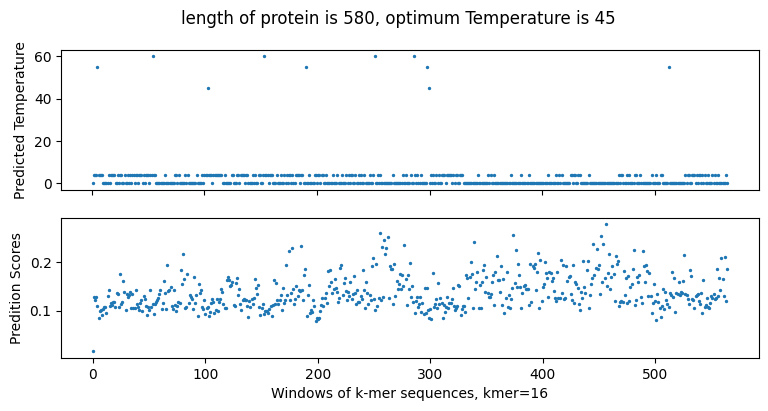

,temperature,start,end,seq
0,4,2,20,TMLKEIKKADLSAAFYPS
1,55,5,21,KEIKKADLSAAFYPSG
2,4,6,49,EIKKADLSAAFYPSGELAWILNQVNLELIVAHGDIEIPLSRAE
3,60,54,70,GDKIEIYPLLSRDAEV
4,4,55,83,DKIEIYPLLSRDAEVGFGVQHWYLVLQD
5,45,103,119,TVDGDLEFDLVYLQDL
6,4,104,146,VDGDLEFDLVYLQDLGLAQAAVRTNEMYHGAGFTVARQEPAI
7,60,153,169,RQNQPQNERFPAVQIG
8,4,154,188,QNQPQNERFPAVQIGALTIVGDITYLTENLKESL
9,55,190,206,LTSELANLKEKSLPSR


In [383]:
aa = 'MTMLKEIKKADLSAAFYPSGELAWLKLKDIMLNQVIQNPLENRLSQIYVRAHVGDKIEIYPLLSRDAEVGFNENGVEYRGVVGPFRYSVQMHFHTRGWFYDV'+\
    'TVDGDLEFDLVYLQDLGLAEQAAVRTNEAYMSQYIDYHVTEGATGFTVQARQNQPQNERFPAVQIGALTKIVGYATDGFDIYGTNYKLTSELANLKEKSLPSRV' + \
    'YQYEFAQISLQTELFTNHGETIFYGYATENQPKASGAPFENLAELKSNISEQPYQPSTKAILNKHIGTPITGETISDSWLQENFPDRIQEEQQNGALLSFFTPN' + \
    'YAHVVMREKEAELERPHGSILLDKVDVLNPEATLSATTYMYGAFLSQLVAGNTNMNKWNSHARNPLNILQTSGLRIYIELDSELRLLGVPSVWETSTNYSTWYY' + \
    'QWNGDLITVQTTLTADSKEAFVTVHSEKGHSYKLVLTNQVTMGTNEYDTTVKKEIKDGIVTYFPAEDSPILETYPALQFRVDGTYNELTDERYFAKDYVGTAGL' + \
    'DVFVFEPSDKATFHVQAKLSDEFSKPTEDLEANNKVIRASYDELTAQFHLNHQSTTAEKLNL'
aa_temp = 45

client.kmer_predict(aa)
client.get_temperature()
client.draw_temp(aa_temp)
client.get_region()

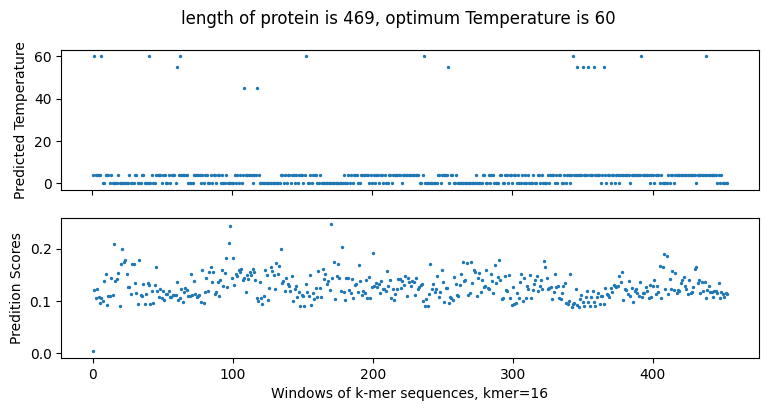

,temperature,start,end,seq
0,4,1,17,MKKLAKMISIATLGAC
1,60,2,18,KKLAKMISIATLGACA
2,4,3,22,KLAKMISIATLGACAFSAH
3,60,7,23,MISIATLGACAFSAHA
4,4,10,35,IATLGACAFSAHALDGKLPLDDYMS
5,60,41,57,VDSVNDYSSAMSTTPA
6,4,43,69,SVNDYSSAMSTTPAGVYVGINLLSNA
7,55,61,77,YVGIVNLDGLASNADA
8,4,62,78,VGIVNLDGLASNADAG
9,60,63,79,GIVNLDGLASNADAGA


In [384]:
aa = 'MKKLAKMISIATLGACAFSAHALDGKLVPNEGVLVSVGQDVDSVNDYSSAMSTTPAGVTNYVGIVNLDGLASNADAGAGRNNVVELANLYPTSALI' + \
    'VGVSMNGQIQNVAQGQYNANIDTLIQTLGELDRPVYLRWAYEVDGPWNGHNTEDLKQSFRNVYQRIRELGYGDNISMIWQVASYCPTAPGQLSSWWPGDD' + \
    'VVDWVGLSYFAPQDCNWDRVNEAAQWARSHNKPLFINESSPQRYQLADRTYSSDPAKGTNRQSKTEQQIWSEWFAPYFQFMEDNKDILKGFTYINADWD' + \
    'SQWRWAAPYNEGYWGDSRVQVLPYIKQQWQDTLENPKFINHSSDLFAKLGYVADGGDNGGDNGGDNGGDNGGDNGGDNGGTEPPENCQDDFNFNYVSDQE' + \
    'IEVYHVDKGWSAGWNYVCLNDYCLPGNKSNGAFRKTFNAVLGQDYKLTFKVEDRYGQGQQILDRNITFTTQVCN'
aa_temp = 60

client.kmer_predict(aa)
client.get_temperature()
client.draw_temp(aa_temp)
client.get_region()

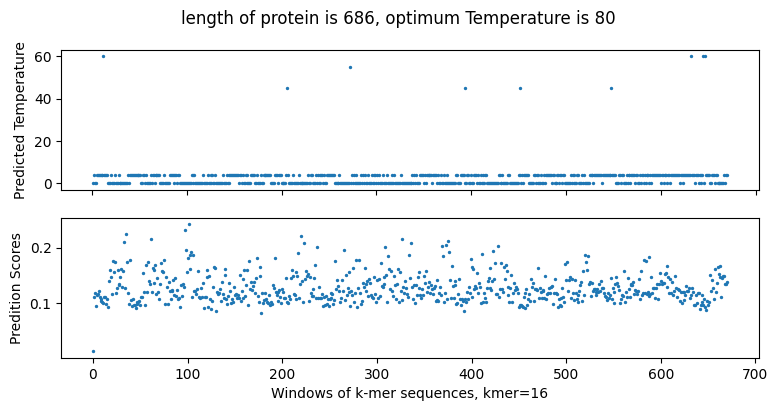

,temperature,start,end,seq
0,4,2,25,TKSIYFSLGIHNHQPVFDFVIER
1,60,12,28,HNHQPVGNFDFVIERA
2,4,13,115,NHQPVGNFDFVIERAYEMSLFPGLLLWLEKNHPEYKLIGIEVSGGF...
3,45,206,222,DKSKIALLFDDGEKFG
4,4,207,243,KSKIALLFDDGEKFGLYEINFTVLTYQKPKGRIYLR
5,55,272,288,TASYREMMEWVLFPEA
6,4,274,334,SYREMMEWVLFPEAQKLLKELKYGGWNKSKLQMEFANDAWGIFGGL...
7,45,394,410,ENSEIRFNIFDFDCDG
8,4,396,428,SEIRFNIFDFDCDGNDEVPFFLSHGSLTLAYE
9,45,451,467,RKEAYHSKLSYVTSEA


In [385]:
aa= 'MTKSIYFSLGIHNHQPVGNFDFVIERAYEMSYKPLINFFFKHPDFPINVHFSGFLLLWLEKNHPEYFEKLKIMAERGQIEFVSGGFYEPILPIIPDKDKVQQ' + \
    'IKKLNKYIYDKFGQTPKGMWLAERVWEPHLVKYIAEAGIEYVVVDDAHFFSVGLKEEDLFGYYLMEEQGYKLAVFPISMKLRYLIPFADPEETITYLDKFASE' + \
    'DKSKIALLFDDGEKFGLWPDTYRTVYEEGWLETFVSKIKENFLLVTPVNLYTYMQRVKPKGRIYLPTASYREMMEWVLFPEAQKELEELVEKLKTENLWDKF' + \
    'SPYVKGGFWRNFLAKYDESNHMQKKMLYVWKKVQDSPNEEVKEKAMEEVFQGQANDAYWHGIFGGLYLPHLRTAIYEHLIKAENYLENSEIRFNIFDFDCDG' + \
    'NDEIIVESPFFNLYLSPNHGGSVLEWDFKTKAFNLTNVLTRRKEAYHSKLSYVTSEAQGKSIHERWTAKEEGLENILFYDNHRRVSFTEKIFESEPVLEDLW' + \
    'KDSSRLEVDSFYENYDYEINKDENKIRVLFSGVFRGFELCKSYILYKDKSFVDVVYEIKNVSETPISLNFGWEINLNFLAPNHPDYYFLIGDQKYPLSSFGI' + \
    'EKVNNWKIFSGIGIELECVLDVEASLYRYPIETVSLSEEGFERVYQGSALIHFYKVDLPVGSTWRTTIRFWVK'
aa_temp = 80

client.kmer_predict(aa)
client.get_temperature()
client.draw_temp(aa_temp)
client.get_region()

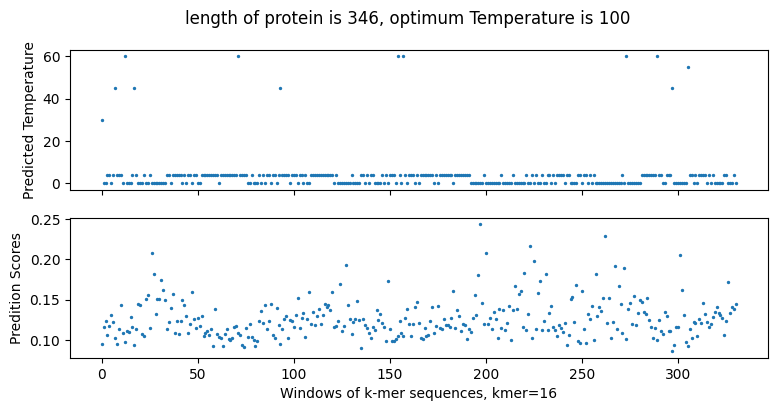

,temperature,start,end,seq
0,4,3,21,DWELMKKIIESPGVSGYH
1,45,7,23,MKKIIESPGVSGYEHL
2,4,8,26,KKIIESPGVSGYEHLGIR
3,60,12,28,ESPGVSGYEHLGIRDL
4,4,16,32,VSGYEHLGIRDLVVDI
5,45,17,33,SGYEHLGIRDLVVDIL
6,4,18,66,GYEHLGIRDLVVDILKDKAHKGSAPVVAHMIGLMVNHIDDGYLRVVPI
7,60,71,87,VNHIDKDGYLRVVPIG
8,4,72,99,NHIDKDGYLRVVPIGGVLPLKRFTKGR
9,45,93,109,LIAQKIRFFTEKGERY


In [386]:
aa = 'MVDWELMKKIIESPGVSGYEHLGIRDLVVDILKDVADEVKIDKLGNVIAHFKGSAPKVMVAAHMDKIGLMVNHIDKDGYLRVVPIGGVLPETLIAQKIRFFT'+\
    'EKGERYGVVGVLPPHLRREAKDQGGKIDWDSIIVDVGASSREEAEEMGFRIGTIGEFAPNFTRLSEHRFATPYLDDRICLYAMIEAARQLGEHEADIYIVASVQ'+\
    'EEIGLRGARVASFAIDPEVGIAMDVTFAKQPNDKGKIVPELGKGPVMDVGPNINPKLRQFADEVAKKYEIPLQVEPSPRPTGTDANVMQINREGVATAVLSIPI'+\
    'RYMHSQVELADARDVDNTIKLAKALLEELKPMDFTP'
aa_temp = 100

client.kmer_predict(aa)
client.get_temperature()
client.draw_temp(aa_temp)
client.get_region()

In [10]:
#@title Step 5 Loading the Trained Tokenizer Files 
from tokenizers.implementations import ByteLevelBPETokenizer
from tokenizers.processors import BertProcessing

tokenizer = ByteLevelBPETokenizer(f"./{output_name}/vocab.json", f"./{output_name}/merges.txt")